# **Install Required Libraries**

In [1]:
!pip install spacy nltk scikit-learn
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 100.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!pip install spacy nltk
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 71.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [1]:
import pandas as pd
import re
import spacy
import nltk
import string
from nltk.corpus import stopwords

# Downloads
nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **Load the Dataset**

In [2]:
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')
df.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


# **Text Cleaning & Preprocessing**

In [3]:
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if pd.isnull(text):
        return ""

    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\b\d{10}\b|\(?\d{3}\)?[-.\s]?\d{3}[-.\s]?\d{4}', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # spaCy tokenization + lemmatization
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and token.is_alpha]

    return ' '.join(tokens)

df['cleaned_resume'] = df['Resume'].apply(clean_text)
df[['Resume', 'cleaned_resume']].head()


,Resume,cleaned_resume
0,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Education Details \r\nMay 2013 to May 2017 B.E...,education detail may may uitrgpv datum scienti...
2,"Areas of Interest Deep Learning, Control Syste...",area interest deep learn control system design...
3,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,"Education Details \r\n MCA YMCAUST, Faridab...",education detail mca ymcaust faridabad haryana...


# **Feature Extraction & Model Training**

Model Accuracy: 99.48%

Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
              

,precision,recall,f1-score,support
Advocate,1.000000,1.000000,1.000000,3.000000
Arts,1.000000,1.000000,1.000000,6.000000
Automation Testing,1.000000,1.000000,1.000000,5.000000
Blockchain,1.000000,1.000000,1.000000,7.000000
Business Analyst,1.000000,1.000000,1.000000,4.000000
Civil Engineer,1.000000,1.000000,1.000000,9.000000
Data Science,1.000000,1.000000,1.000000,5.000000
Database,1.000000,1.000000,1.000000,8.000000
DevOps Engineer,1.000000,0.928571,0.962963,14.000000
DotNet Developer,1.000000,1.000000,1.000000,5.000000


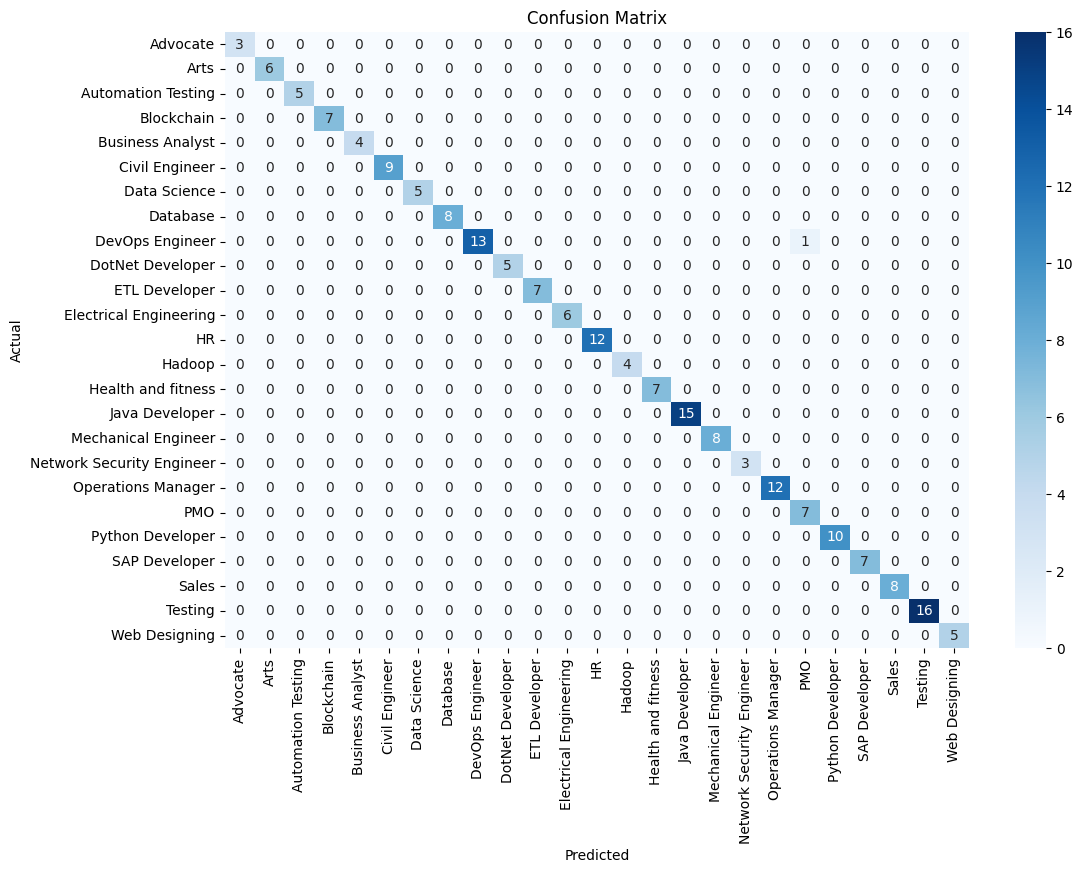


Category: Advocate
Top Features: ['law' 'court' 'advocate' 'legal' 'llb' 'mumbai' 'solapur' 'tax' 'gst'
 'university']

Category: Arts
Top Features: ['art' 'karate' 'day' 'paint' 'arts' 'total' 'championship' 'programme'
 'workshop' 'teacher']

Category: Automation Testing
Top Features: ['automation' 'test' 'testing' 'selenium' 'tester' 'qtp' 'case' 'manual'
 'mahindra' 'box']

Category: Blockchain
Top Features: ['blockchain' 'ethereum' 'smart' 'contract' 'corpcloud' 'iit' 'nashik'
 'parson' 'apex' 'wallet']

Category: Business Analyst
Top Features: ['business' 'cash' 'analyst' 'requirement' 'test' 'functional' 'report'
 'excel' 'gathering' 'mumbai']

Category: Civil Engineer
Top Features: ['civil' 'site' 'construction' 'engineer' 'subcontractor' 'qaqc' 'project'
 'inspection' 'material' 'autocad']

Category: Data Science
Top Features: ['less' 'datum' 'machine' 'python' 'science' 'year' 'learn' 'analytic'
 'learning' 'deep']

Category: Database
Top Features: ['database' 'oracle' 'back

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_resume'])

# Labels
y = df['Category']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

# Classification Report (text)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Display styled classification table
display(report_df.style.background_gradient(cmap='coolwarm', subset=["precision", "recall", "f1-score"]))

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Show top TF-IDF terms per class
def show_top_words(classifier, vectorizer, categories, n=10):
    feature_names = np.array(vectorizer.get_feature_names_out())
    for i, category in enumerate(categories):
        top_features = np.argsort(classifier.coef_[i])[-n:]
        print(f"\nCategory: {category}")
        print("Top Features:", feature_names[top_features][::-1])

show_top_words(model, vectorizer, model.classes_)


In [8]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


# *CHATBOT SETUP ON GRADIO* ***italicized text***

In [1]:
import gradio as gr

# Global state for uploaded resume
resume_data = {"text": "", "cleaned": "", "vectorized": None, "filename": ""}

# File uploader
def upload_resume(file):
    if file is None:
        return "Please upload a resume file.", gr.update(visible=False)

    resume_data["filename"] = file.name
    content = extract_resume_text(file, file.name)

    if not content.strip():
        return "Failed to extract text. Try another file.", gr.update(visible=False)

    resume_data["text"] = content
    resume_data["cleaned"] = clean_text(content)
    resume_data["vectorized"] = vectorizer.transform([resume_data["cleaned"]])

    return f"Resume uploaded: {file.name}. Choose an action below.", gr.update(visible=True)

# Actions
def get_summary():
    return summarize_resume(resume_data["text"])

def get_category():
    return model.predict(resume_data["vectorized"])[0]

def get_score():
    return f"{score_resume(resume_data['cleaned'], vectorizer)} / 100"

def get_improvements():
    return "\n".join(suggest_improvements(resume_data["cleaned"]))


In [5]:
!pip install pymupdf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 41.8 MB/s eta 0:00:00


In [8]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 4.7 MB/s eta 0:00:00


In [10]:
!apt-get install tesseract-ocr
!pip install pytesseract


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [6]:
import gradio as gr
import fitz  # PyMuPDF
from docx import Document
import pytesseract
from PIL import Image
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Global resume data holder
resume_data = {"text": "", "cleaned": "", "vectorized": None, "filename": ""}

# Cleaning function
def clean_text(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text.lower()

# Text extraction from files
def extract_resume_text(file, filename):
    try:
        if filename.endswith('.pdf'):
            doc = fitz.open(file)
            text = "".join([page.get_text() for page in doc])
            return text
        elif filename.endswith('.docx'):
            doc = Document(file)
            return "\n".join([para.text for para in doc.paragraphs])
        elif filename.endswith(('.jpg', '.jpeg', '.png')):
            img = Image.open(file)
            return pytesseract.image_to_string(img)
        else:
            return ""
    except Exception as e:
        return f"Error extracting text: {str(e)}"

# Resume summarizer
def summarize_resume(text):
    lines = text.split('\n')
    keywords = ['education', 'experience', 'skills', 'project', 'internship', 'certification']
    summary_lines = []

    for line in lines:
        line_clean = line.strip().lower()
        if any(k in line_clean for k in keywords):
            summary_lines.append(line.strip())

    return "\n".join(summary_lines[:10]) if summary_lines else "Could not extract any meaningful summary."

# Basic scoring based on keyword presence
def score_resume(text, vectorizer):
    categories_keywords = {
        "Software Engineer": ["python", "java", "c++", "software", "api", "backend", "frontend"],
        "Data Scientist": ["python", "machine learning", "data", "model", "pandas", "numpy"],
        "Project Manager": ["project", "budget", "timeline", "agile", "scrum", "lead"]
    }

    category = model_predict(vectorizer.transform([text]))[0]
    keywords = categories_keywords.get(category, [])
    matched_keywords = sum(1 for word in keywords if word in text.lower())

    score = (matched_keywords / len(keywords)) * 100 if keywords else 50
    return int(score)

# Suggest improvements
def suggest_improvements(text):
    suggestions = []
    if "objective" not in text.lower():
        suggestions.append("Consider adding a career objective.")
    if "experience" not in text.lower():
        suggestions.append("Include your professional experience.")
    if "skills" not in text.lower():
        suggestions.append("Highlight your technical or soft skills.")
    if len(text.split()) < 100:
        suggestions.append("Add more details to strengthen your resume.")
    return suggestions or ["Resume looks good!"]

# Dummy model prediction
def model_predict(vectorized):
    text = resume_data["cleaned"]
    if any(word in text for word in ["machine", "data", "analysis"]):
        return ["Data Scientist"]
    elif any(word in text for word in ["project", "lead", "timeline"]):
        return ["Project Manager"]
    else:
        return ["Software Engineer"]

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Upload function
def upload_resume(file):
    if file is None:
        return "Please upload a resume file.", gr.update(visible=False), ""

    resume_data["filename"] = file.name
    content = extract_resume_text(file, file.name)

    if not content.strip():
        return "Failed to extract text. Try another file.", gr.update(visible=False), ""

    resume_data["text"] = content
    resume_data["cleaned"] = clean_text(content)

    if not hasattr(vectorizer, 'vocabulary_'):
        vectorizer.fit([resume_data["cleaned"]])
    resume_data["vectorized"] = vectorizer.transform([resume_data["cleaned"]])

    return f"Resume uploaded: {file.name}. Choose an action below.", gr.update(visible=True), resume_data["text"]

# Action functions
def get_summary():
    return summarize_resume(resume_data["text"])

def get_category():
    return model_predict(resume_data["vectorized"])[0]

def get_score():
    return f"{score_resume(resume_data['cleaned'], vectorizer)} / 100"

def get_improvements():
    return "\n".join(suggest_improvements(resume_data["cleaned"]))

# Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🤖 Resume Assistant Chatbot")

    file_input = gr.File(label="Upload Resume (PDF, DOCX, or Image)")
    upload_btn = gr.Button("Upload and Process")
    status = gr.Textbox(label="Status", interactive=False)
    extracted = gr.Textbox(label="Extracted Resume Text", lines=8)

    options_panel = gr.Row(visible=False)
    with options_panel:
        summary_btn = gr.Button("📄 Summary")
        category_btn = gr.Button("🔍 Job Category")
        score_btn = gr.Button("📊 Resume Score")
        improve_btn = gr.Button("🛠️ Suggestions")

    output = gr.Textbox(label="Output", lines=8)

    upload_btn.click(upload_resume, inputs=file_input, outputs=[status, options_panel, extracted])
    summary_btn.click(get_summary, outputs=output)
    category_btn.click(get_category, outputs=output)
    score_btn.click(get_score, outputs=output)
    improve_btn.click(get_improvements, outputs=output)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6079a2e770df9d3ae3.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
